PokemonGo

In [127]:
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib inline 

pokemon_data = pd.read_csv('/home/prem/Desktop/Kaggle Projects/PokemonGO/pokemonGO.csv', sep=',')

#pokemon_data = pokemon_data.set_index('Pokemon No.')

pokemon_data.set_index('Pokemon No.', inplace=True)

print(pokemon_data)

#Type1 is main type of pokemon, some pokemon are of dual type so Type2 column

                   Name    Type 1   Type 2  Max CP  Max HP  \
Pokemon No.                                                  
1             Bulbasaur     Grass   Poison    1079      83   
2               Ivysaur     Grass   Poison    1643     107   
3              Venusaur     Grass   Poison    2598     138   
4            Charmander      Fire      NaN     962      73   
5            Charmeleon      Fire      NaN    1568     103   
6             Charizard      Fire   Flying    2620     135   
7              Squirtle     Water      NaN    1015      81   
8             Wartortle     Water      NaN    1594     105   
9             Blastoise     Water      NaN    2560     137   
10             Caterpie       Bug      NaN     446      83   
11              Metapod       Bug      NaN     481      91   
12           Butterfree       Bug   Flying    1465     107   
13               Weedle       Bug   Poison     452      75   
14               Kakuna       Bug   Poison     488      83   
15      

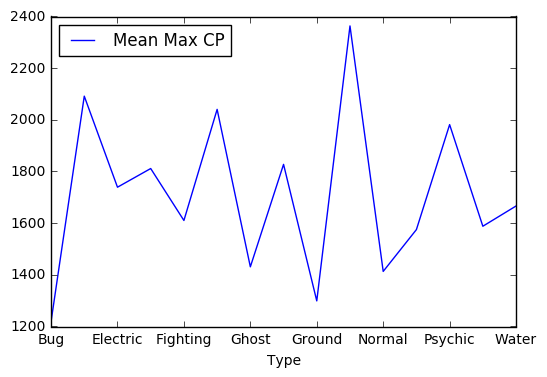

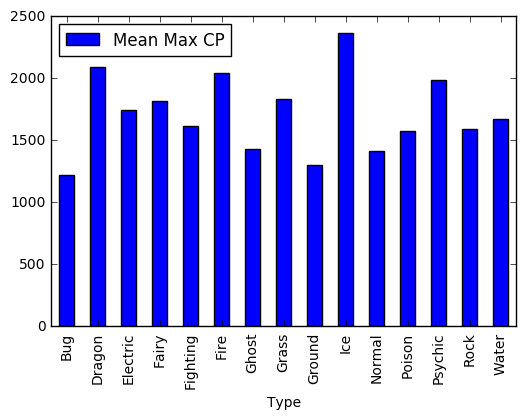

In [128]:
#Type1 vs Max CP

type1_cp = pokemon_data[['Name','Type 1','Max CP']]
type_cp_series = type1_cp.groupby('Type 1')['Max CP'].mean()
type_cp = pd.DataFrame(type_cp_series.to_frame('Mean Max CP').reset_index())
type_cp.columns = ['Type', 'Mean Max CP']
type_cp.plot(x='Type', y='Mean Max CP')
type_cp.plot.bar(x='Type', y='Mean Max CP')

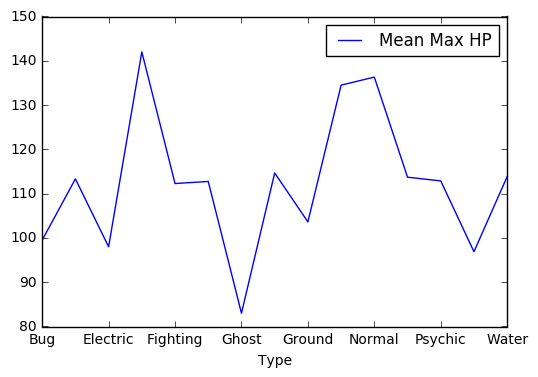

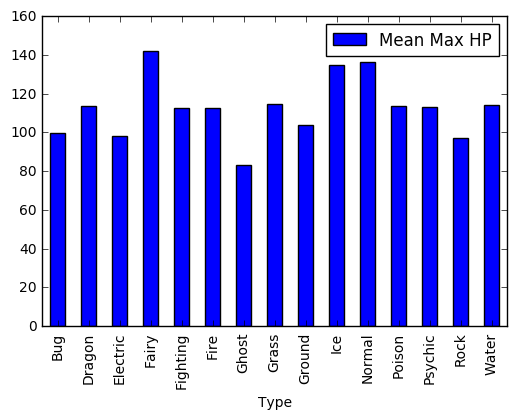

In [129]:
#Type1 vs Max HP

type1_hp = pokemon_data[['Name','Type 1','Max HP']]
type_hp_series = type1_hp.groupby('Type 1')['Max HP'].mean()
type_hp = pd.DataFrame(type_hp_series.to_frame('Mean Max HP').reset_index())
type_hp.columns = ['Type', 'Mean Max HP']
type_hp.plot(x='Type', y='Mean Max HP')
type_hp.plot.bar(x='Type', y='Mean Max HP')

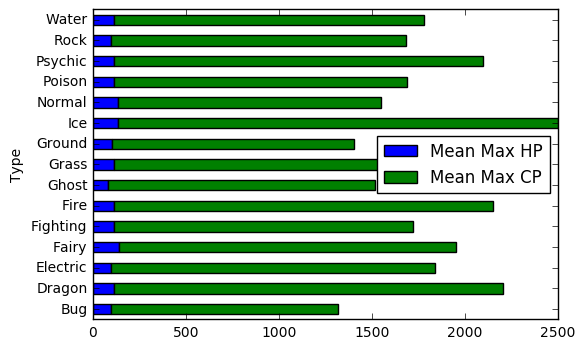

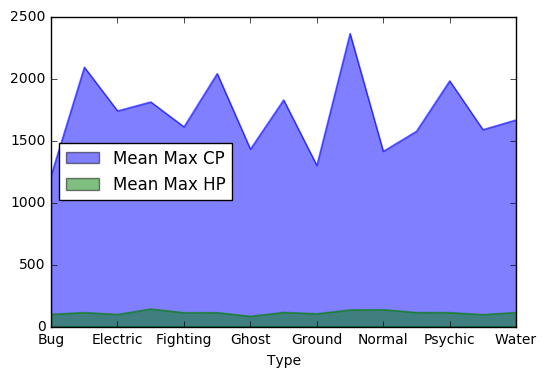

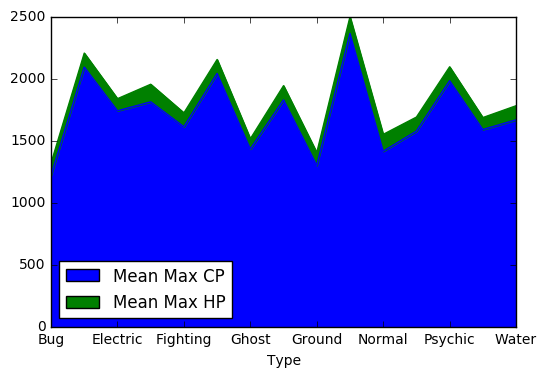

In [130]:
# Type1 vs Total Power(Max CP + Max HP)

type_power = pd.merge(type_cp,type_hp,left_on='Type',right_on='Type')
type_power.plot.barh(x='Type', y=['Mean Max HP','Mean Max CP'],stacked=True)
type_power.plot.area(x='Type',stacked=False)
type_power.plot.area(x='Type')

In [131]:
# Type counts (considering pairs of Type1 & Type2)

pokemon_data['Type 2'].fillna(value=pokemon_data['Type 1'],inplace=True)
cnt = pokemon_data.groupby(['Type 1', 'Type 2']).size()
type_cnt = cnt.reset_index()
type_cnt.columns=['Type 1', 'Type 2', 'Count']
type_cnt

,Type 1,Type 2,Count
0,Bug,Bug,3
1,Bug,Flying,2
2,Bug,Grass,2
3,Bug,Poison,5
4,Dragon,Dragon,2
5,Dragon,Flying,1
6,Electric,Electric,6
7,Electric,Flying,1
8,Electric,Steel,2
9,Fairy,Fairy,2


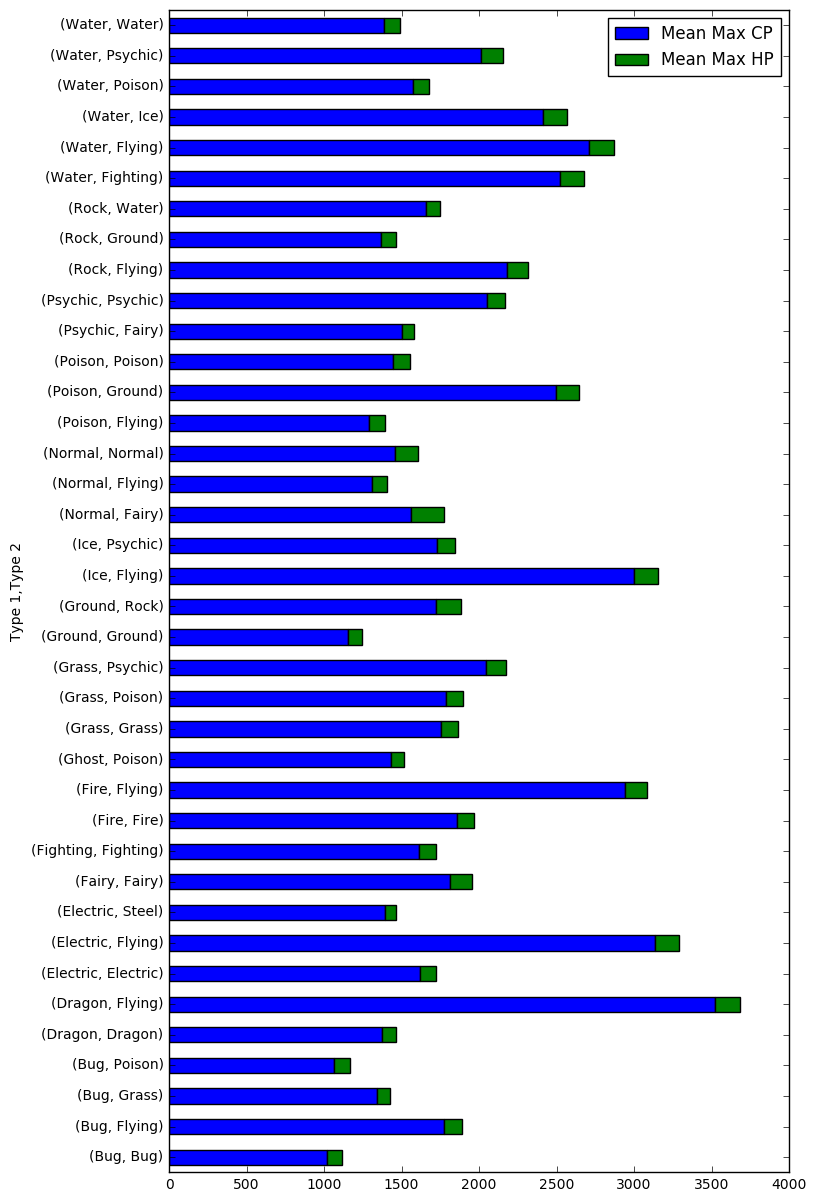

In [132]:
# Considering both Types vs Total Power(Max CP + Max HP)

two_type = pokemon_data.groupby(['Type 1', 'Type 2'])['Max CP','Max HP'].mean()
two_type.columns=['Mean Max CP', 'Mean Max HP']
two_type.plot.barh(y=['Mean Max CP','Mean Max HP'],stacked=True, figsize = (8,15))

In [133]:
# ordering pokemons based on Total power in descending order

pokemon_data['Total Max Power'] = pokemon_data['Max CP'] + pokemon_data['Max HP']
pokemon_data.sort_values(by='Total Max Power',ascending=False)[['Name','Type 1','Type 2','Total Max Power']].set_index(['Type 1','Type 2'])

,,Name,Total Max Power
Type 1,Type 2,,
Psychic,Psychic,Mewtwo,4354
Dragon,Flying,Dragonite,3681
Psychic,Psychic,Mew,3492
Fire,Flying,Moltres,3417
Normal,Normal,Snorlax,3400
Electric,Flying,Zapdos,3290
Water,Ice,Lapras,3220
Fire,Fire,Arcanine,3159
Ice,Flying,Articuno,3153
